<a href="https://colab.research.google.com/github/medha2716/image-seg-ship-detection/blob/main/yolo_v8_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics==8.2.28

In [ ]:
!ultralytics version


8.2.28


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/My Drive/ImageSegmentationYOLOv8'

annotations_coco_format  config.yaml  data  data2


In [ ]:
DATA_DIR = '/content/gdrive/My Drive/ImageSegmentationYOLOv8/data/'

# Test and Train images added to respective folders

In [ ]:
import json
import os
import shutil

path_folder_annotations = '/content/gdrive/My Drive/annotations'

# Load the JSON files with annotations
with open(path_folder_annotations+'/train2017.json', 'r') as f:
    train_data = json.load(f)

with open(path_folder_annotations+'/test2017.json', 'r') as f:
    test_data = json.load(f)

# Directory paths
source_dir = '/content/gdrive/My Drive/JPEGImages'

# test images
dest_dir = DATA_DIR+'images/val'


# Create the destination directory if it doesn't exist
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# Loop through each image in the JSON file
for image in test_data['images']:
    file_name = image['file_name']
    source_file = os.path.join(source_dir, file_name)
    dest_file = os.path.join(dest_dir, file_name)

    # Copy the file to the destination directory
    if os.path.exists(source_file):
        if not os.path.exists(dest_file):
          shutil.copy(source_file, dest_file)
        # print(f"Copied {source_file} to {dest_file}")
        else:
          print("File already stored!")
    else:
        print(f"File {source_file} does not exist")

print("Done copying test images!")

# train images
dest_dir = DATA_DIR+'images/train'


# Create the destination directory if it doesn't exist
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# Loop through each image in the JSON file
for image in train_data['images']:
    file_name = image['file_name']
    source_file = os.path.join(source_dir, file_name)
    dest_file = os.path.join(dest_dir, file_name)

    # Copy the file to the destination directory
    if os.path.exists(source_file):
        if not os.path.exists(dest_file):
          shutil.copy(source_file, dest_file)
        # print(f"Copied {source_file} to {dest_file}")
        else:
          print("File already stored!")
    else:
        print(f"File {source_file} does not exist")

print("Done copying train images!")

In [ ]:
import os
from ultralytics.data.converter import convert_coco

path_folder_annotations = '/content/gdrive/My Drive/ImageSegmentationYOLOv8/annotations_coco_format'

# Define the path to your COCO dataset annotations and the output directory
labels_dir = path_folder_annotations
save_dir = "/content/gdrive/My Drive/ImageSegmentationYOLOv8/data"

# Convert the COCO dataset to YOLO format
convert_coco(labels_dir=labels_dir, save_dir=save_dir, use_segments=True)

Annotations /content/gdrive/My Drive/ImageSegmentationYOLOv8/annotations_coco_format/train.json: 100%|██████████| 3642/3642 [00:27<00:00, 130.15it/s]
Annotations /content/gdrive/My Drive/ImageSegmentationYOLOv8/annotations_coco_format/val.json: 100%|██████████| 1961/1961 [00:14<00:00, 131.60it/s]

COCO data converted successfully.
Results saved to /content/gdrive/My Drive/ImageSegmentationYOLOv8/data2



# Move "labels" folder from "data2" folder to "data" folder

In [ ]:
import shutil
import os

# Define the source and destination paths
source_folder = '/content/gdrive/My Drive/ImageSegmentationYOLOv8/data2/labels'
destination_folder = '/content/gdrive/My Drive/ImageSegmentationYOLOv8/data/labels'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Move the contents of the source folder to the destination folder
for filename in os.listdir(source_folder):
    shutil.move(os.path.join(source_folder, filename), os.path.join(destination_folder, filename))

print("Labels moved successfully!")

In [ ]:
import os

from ultralytics import YOLO


model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

model.train(data='/content/gdrive/My Drive/ImageSegmentationYOLOv8/config.yaml',
            imgsz = 800,
            seed = 42,
            batch = 4,
            workers = 4, patience = 90)


# Download model and runs folder

In [ ]:
from google.colab import files
import zipfile
import os

def zip_folder(folder_path, zip_path):
    """
    Compresses the contents of a folder into a zip file.

    Args:
    - folder_path (str): Path to the folder to be compressed.
    - zip_path (str): Path to the output zip file.
    """
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, folder_path))

# Example usage:
folder_path = '/content/runs'  # Replace with the path to your folder
zip_path = '/content/runs.zip'  # Replace with the desired path for the zip file

zip_folder(folder_path, zip_path)
files.download(zip_path)

# upload this zip file for the next parts or change code to directly use this folder

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!unzip /content/runs.zip

unzip:  cannot find or open contents/runs.zip, contents/runs.zip.zip or contents/runs.zip.ZIP.


# Resuming training from where we left off

In [ ]:
from ultralytics import YOLO
import zipfile

# Extract the model file from the zip file
# with zipfile.ZipFile('/content/runs.zip', 'r') as zip_ref:
#     zip_ref.extract('segment/train/weights/last.pt', '/content')

model_path = '/content/last.pt'

# Load a model
model = YOLO(model_path)  # load a partially trained model

# Resume training
results = model.train(resume=True)

# resume=True, the train function will continue training from where it left off, using the state stored in 'last.pt'.
# resume=False, the train function will start a new training session.

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/content/last.pt, data=/content/gdrive/My Drive/ImageSegmentationYOLOv8/config.yaml, epochs=100, time=None, patience=90, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

100%|██████████| 755k/755k [00:00<00:00, 4.05MB/s]


TensorBoard: Start with 'tensorboard --logdir runs/segment/train', view at http://localhost:6006/

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True] 

100%|██████████| 6.23M/6.23M [00:00<00:00, 21.1MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/gdrive/My Drive/ImageSegmentationYOLOv8/data/labels/train.cache... 3642 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3642/3642 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/My Drive/ImageSegmentationYOLOv8/data/labels/val... 1961 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1962/1962 [22:56<00:00,  1.43it/s]


val: New cache created: /content/gdrive/My Drive/ImageSegmentationYOLOv8/data/labels/val.cache
Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Resuming training /content/last.pt from epoch 37 to 100 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/911 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     37/100      1.41G     0.9989      1.298     0.6172     0.9228          6        800: 100%|██████████| 911/911 [20:20<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:56<00:00,  4.36it/s]

                   all       1962       5922      0.907      0.774      0.882      0.608      0.877      0.728      0.821      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.53G     0.9912      1.292     0.6198     0.9205          6        800: 100%|██████████| 911/911 [03:36<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:52<00:00,  4.69it/s]


                   all       1962       5922      0.887      0.734      0.846      0.579      0.863      0.688      0.782      0.427

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.67G     0.9961       1.29     0.6188     0.9158         11        800: 100%|██████████| 911/911 [03:32<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:55<00:00,  4.41it/s]

                   all       1962       5922      0.906       0.78      0.883      0.615      0.874      0.743      0.831       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.34G     0.9719      1.248     0.5927     0.9146          5        800: 100%|██████████| 911/911 [03:34<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:52<00:00,  4.70it/s]


                   all       1962       5922      0.885      0.781      0.876       0.61      0.869      0.737      0.824      0.464

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.67G     0.9607      1.246      0.583     0.9088          9        800: 100%|██████████| 911/911 [03:32<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:59<00:00,  4.10it/s]

                   all       1962       5922      0.891       0.77       0.87      0.602      0.856      0.724      0.811      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100       1.5G     0.9512      1.243     0.5872     0.9115          7        800: 100%|██████████| 911/911 [03:32<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:52<00:00,  4.72it/s]

                   all       1962       5922      0.898      0.782      0.878      0.607      0.879      0.737       0.83      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100       1.7G      0.975       1.27     0.5975     0.9174          3        800: 100%|██████████| 911/911 [03:31<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:55<00:00,  4.45it/s]


                   all       1962       5922      0.892      0.776      0.873      0.594      0.857      0.721      0.805      0.442

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.48G     0.9676      1.247     0.5885     0.9131          9        800: 100%|██████████| 911/911 [03:29<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:58<00:00,  4.19it/s]


                   all       1962       5922      0.899      0.781      0.882      0.615      0.871      0.738       0.83      0.467

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.53G     0.9715      1.233      0.586     0.9143          1        800: 100%|██████████| 911/911 [03:36<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:54<00:00,  4.51it/s]

                   all       1962       5922      0.892       0.78      0.881      0.607      0.883      0.729      0.829      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.57G     0.9508      1.242     0.5721     0.9125          1        800: 100%|██████████| 911/911 [03:36<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:53<00:00,  4.64it/s]


                   all       1962       5922       0.89      0.759      0.865      0.597      0.873      0.723      0.817      0.454

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.65G     0.9716      1.273     0.5845     0.9163          3        800: 100%|██████████| 911/911 [03:29<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:59<00:00,  4.13it/s]

                   all       1962       5922      0.897      0.776      0.875      0.612      0.879      0.732      0.825      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.44G     0.9473       1.24     0.5754     0.9137         19        800: 100%|██████████| 911/911 [03:32<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:55<00:00,  4.45it/s]

                   all       1962       5922      0.901      0.782      0.881      0.613      0.884      0.733      0.829      0.461



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.53G     0.9574      1.244     0.5762     0.9098          8        800: 100%|██████████| 911/911 [03:35<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:52<00:00,  4.68it/s]


                   all       1962       5922      0.895       0.78      0.879      0.612      0.867       0.74      0.824      0.457

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.62G     0.9695      1.246     0.5807     0.9179          7        800: 100%|██████████| 911/911 [03:35<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:57<00:00,  4.24it/s]

                   all       1962       5922      0.904       0.79      0.886      0.621      0.877       0.75      0.839      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.75G     0.9531       1.25     0.5716     0.9135          2        800: 100%|██████████| 911/911 [03:34<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:56<00:00,  4.39it/s]


                   all       1962       5922      0.889      0.793      0.881       0.61      0.861      0.748      0.827      0.461

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.58G     0.9718      1.287     0.5859     0.9157          7        800: 100%|██████████| 911/911 [03:33<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:53<00:00,  4.63it/s]


                   all       1962       5922      0.899      0.799      0.891      0.628      0.865      0.754      0.838      0.474

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.61G     0.9791      1.273     0.5849     0.9141         10        800: 100%|██████████| 911/911 [03:33<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:55<00:00,  4.42it/s]

                   all       1962       5922      0.888      0.779      0.876      0.602      0.864      0.724      0.815      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.37G     0.9681      1.277     0.5809     0.9119          3        800: 100%|██████████| 911/911 [03:37<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:58<00:00,  4.19it/s]

                   all       1962       5922      0.897      0.779      0.883      0.616      0.879      0.724      0.827      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.53G     0.9738      1.258     0.5866     0.9154         10        800: 100%|██████████| 911/911 [03:39<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:56<00:00,  4.35it/s]

                   all       1962       5922      0.895      0.793      0.889      0.618      0.881      0.732       0.83      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.42G     0.9675      1.265     0.5916      0.917         11        800: 100%|██████████| 911/911 [03:38<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:55<00:00,  4.41it/s]

                   all       1962       5922      0.904      0.791      0.889      0.624      0.872      0.744      0.832      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.64G     0.9685      1.268     0.5769     0.9131          9        800: 100%|██████████| 911/911 [03:41<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [01:00<00:00,  4.09it/s]


                   all       1962       5922      0.906      0.779      0.883      0.617      0.881      0.728      0.825      0.465

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.42G     0.9545      1.272      0.575      0.913          6        800: 100%|██████████| 911/911 [03:31<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:55<00:00,  4.45it/s]

                   all       1962       5922        0.9      0.793      0.888      0.622      0.883      0.737      0.832      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.48G     0.9582      1.262     0.5675     0.9101          7        800: 100%|██████████| 911/911 [03:39<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:56<00:00,  4.35it/s]


                   all       1962       5922      0.904      0.792       0.89      0.627      0.881      0.742      0.838      0.476

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.46G     0.9541       1.28     0.5662     0.9128          6        800: 100%|██████████| 911/911 [03:40<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:57<00:00,  4.28it/s]

                   all       1962       5922      0.904      0.794      0.897      0.637      0.885      0.746      0.843       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.55G     0.9537      1.246     0.5724     0.9106          7        800: 100%|██████████| 911/911 [03:43<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:57<00:00,  4.30it/s]

                   all       1962       5922      0.895      0.797      0.891      0.629      0.879      0.749      0.841      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100       1.6G     0.9513      1.244     0.5644     0.9115          4        800: 100%|██████████| 911/911 [03:41<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [01:01<00:00,  4.01it/s]


                   all       1962       5922      0.906      0.798      0.894      0.632      0.878      0.746      0.838      0.479

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.69G     0.9639      1.249     0.5651     0.9136          7        800: 100%|██████████| 911/911 [03:45<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:57<00:00,  4.24it/s]

                   all       1962       5922      0.909      0.793      0.891       0.63      0.877      0.747      0.836      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100       1.5G     0.9661       1.25     0.5788     0.9175          3        800: 100%|██████████| 911/911 [03:40<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:57<00:00,  4.30it/s]

                   all       1962       5922        0.9      0.791      0.888      0.628      0.883      0.737      0.831      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100       1.6G      0.937      1.243     0.5575     0.9044          2        800: 100%|██████████| 911/911 [03:39<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:55<00:00,  4.46it/s]


                   all       1962       5922      0.902      0.804      0.897      0.632      0.876      0.754       0.84      0.478

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.38G     0.9327      1.214     0.5429     0.9037          1        800: 100%|██████████| 911/911 [03:41<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:58<00:00,  4.24it/s]

                   all       1962       5922      0.897      0.799      0.892      0.624      0.863      0.744      0.827      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.75G     0.9345      1.231     0.5492     0.9033         16        800: 100%|██████████| 911/911 [03:43<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:58<00:00,  4.21it/s]


                   all       1962       5922      0.907      0.799      0.893      0.626      0.881      0.751      0.841      0.475

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.56G      0.937       1.21      0.549     0.9027          4        800: 100%|██████████| 911/911 [03:31<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:59<00:00,  4.12it/s]

                   all       1962       5922      0.918      0.789      0.897      0.637      0.886      0.742      0.838      0.482



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.57G     0.9357      1.244     0.5468     0.9088         14        800: 100%|██████████| 911/911 [03:37<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:53<00:00,  4.57it/s]


                   all       1962       5922      0.916        0.8      0.902      0.645      0.892      0.753      0.851      0.486

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.63G     0.9344       1.22     0.5457     0.9068         10        800: 100%|██████████| 911/911 [03:31<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:54<00:00,  4.48it/s]

                   all       1962       5922      0.914      0.802      0.899      0.639      0.876      0.757      0.843      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.64G     0.9384      1.218     0.5402     0.9036          3        800: 100%|██████████| 911/911 [03:42<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:56<00:00,  4.33it/s]


                   all       1962       5922        0.9      0.799      0.896      0.633      0.879      0.747      0.841      0.476

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.49G     0.9419      1.233     0.5508      0.909          6        800: 100%|██████████| 911/911 [03:39<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:53<00:00,  4.57it/s]


                   all       1962       5922      0.908      0.802      0.902      0.639      0.881      0.759      0.849      0.483

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.56G     0.9242      1.213     0.5422     0.9019         10        800: 100%|██████████| 911/911 [03:37<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:55<00:00,  4.45it/s]

                   all       1962       5922      0.899       0.81      0.902      0.639      0.862      0.763      0.844      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.37G     0.9246      1.198     0.5389     0.9018          4        800: 100%|██████████| 911/911 [03:37<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:56<00:00,  4.32it/s]

                   all       1962       5922      0.912      0.804        0.9       0.64      0.891      0.749      0.843      0.482



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.58G     0.9195      1.187     0.5318     0.8968          5        800: 100%|██████████| 911/911 [03:37<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 246/246 [00:55<00:00,  4.44it/s]

                   all       1962       5922       0.91      0.804      0.902      0.643      0.886      0.756      0.852      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.64G     0.8964      1.171     0.5305     0.8994         31        800:  34%|███▍      | 309/911 [01:16<02:26,  4.11it/s]

# Prediction by Model for an input image


image 1/1 /content/ship.jpg: 800x800 1 ship, 630.4ms
Speed: 9.0ms preprocess, 630.4ms inference, 12.5ms postprocess per image at shape (1, 3, 800, 800)


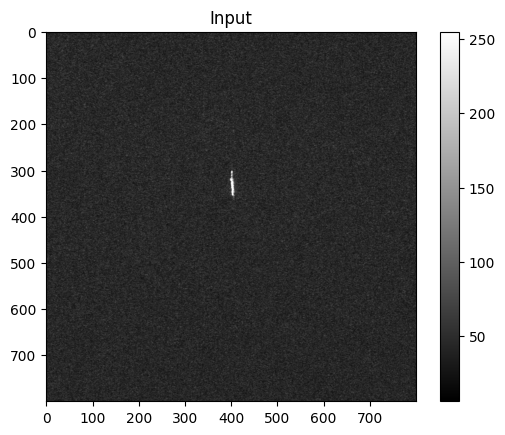

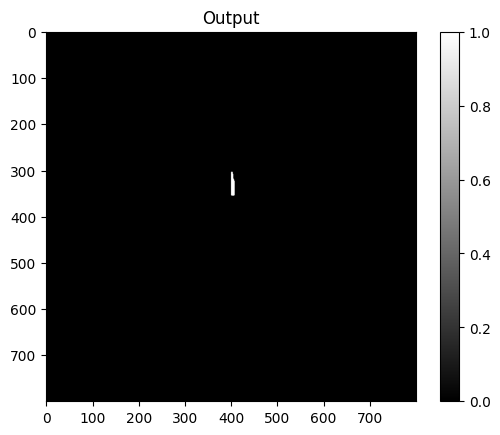

In [18]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import zipfile

# Extract the model file from the zip file
# with zipfile.ZipFile('/content/runs.zip', 'r') as zip_ref:
#     zip_ref.extract('segment/train/weights/best.pt', '/content')

# model_path = '/content/segment/train/weights/best.pt'

model_path = '/content/last.pt'

image_path = '/content/ship.jpg'

model = YOLO(model_path)
results = list(model(image_path, conf=0.56)) # confidence adjusted according to graps (precision, recall, f1)
result = results[0]
# print(result)

actual_img = cv2.imread(image_path)
plt.title("Input")
plt.imshow(actual_img, cmap='gray')
plt.colorbar()
plt.show()

if(result.masks):
  tensor_cpu = result.masks.data.cpu().numpy()

  # has as many channels as the number of ships detected
  # Combine the channels along the depth axis to create a 3D array (H, W, 4)
  # For visualization purposes, we need to normalize the tensor values to [0, 1]
  combined_image = np.max(tensor_cpu, axis=0)

  # Plot the combined image
  plt.title("Output")
  plt.imshow(combined_image, cmap='gray')
  plt.colorbar()
  plt.show()

  # Select the channel (if the tensor has multiple channels)
  # image = tensor_cpu[0]
  # # Plot the image
  # plt.imshow(image, cmap='gray')
  # plt.show()

  # image = tensor_cpu[1]
  # # Plot the image
  # plt.imshow(image, cmap='gray')
  # plt.show()

  # image = tensor_cpu[2]
  # # Plot the image
  # plt.imshow(image, cmap='gray')
  # plt.show()

  # image = tensor_cpu[3]
  # # Plot the image
  # plt.imshow(image, cmap='gray')
  # plt.show()

else:
  print("No ships detected")

  combined_image = np.zeros((800, 800), dtype=np.uint8)
  # Plot the image
  plt.title("Output")
  plt.imshow(combined_image, cmap='gray', vmin=0, vmax=1)
  plt.colorbar()
  plt.show()


In [ ]:
from ultralytics import YOLO

model_path = '/content/last.pt'
model = YOLO(model_path)
validation_results = model.val(data="/content/gdrive/My Drive/ImageSegmentationYOLOv8/config.yaml", imgsz=800, batch=4, conf=0.56, iou=0.6)

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/gdrive/My Drive/ImageSegmentationYOLOv8/data/labels/val.cache... 1961 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1962/1962 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 491/491 [23:35<00:00,  2.88s/it]


                   all       1962       5922      0.967      0.739       0.86      0.683      0.923      0.705      0.831      0.527
Speed: 4.6ms preprocess, 659.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/segment/val3
